# Dynex SDK - Complex Native Gate Circuit Example

First we import the required packages:

In [1]:
import dynex
import dynex_circuit
from pennylane import numpy as np
import pennylane as qml

We define our circuit:

In [2]:
params = [0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4]
wires = 4

def Complex1(params):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RX(params[3], wires=3)
    qml.CZ(wires=[0, 2])
    qml.CRZ(params[4], wires=[1, 3])
    qml.Toffoli(wires=[0, 2, 3])
    qml.SWAP(wires=[0, 3])
    qml.SWAP(wires=[1, 2])
    qml.CRZ(params[5], wires=[3, 1])
    qml.CRY(params[6], wires=[2, 0])
    return qml.state()

We draw the circuit:

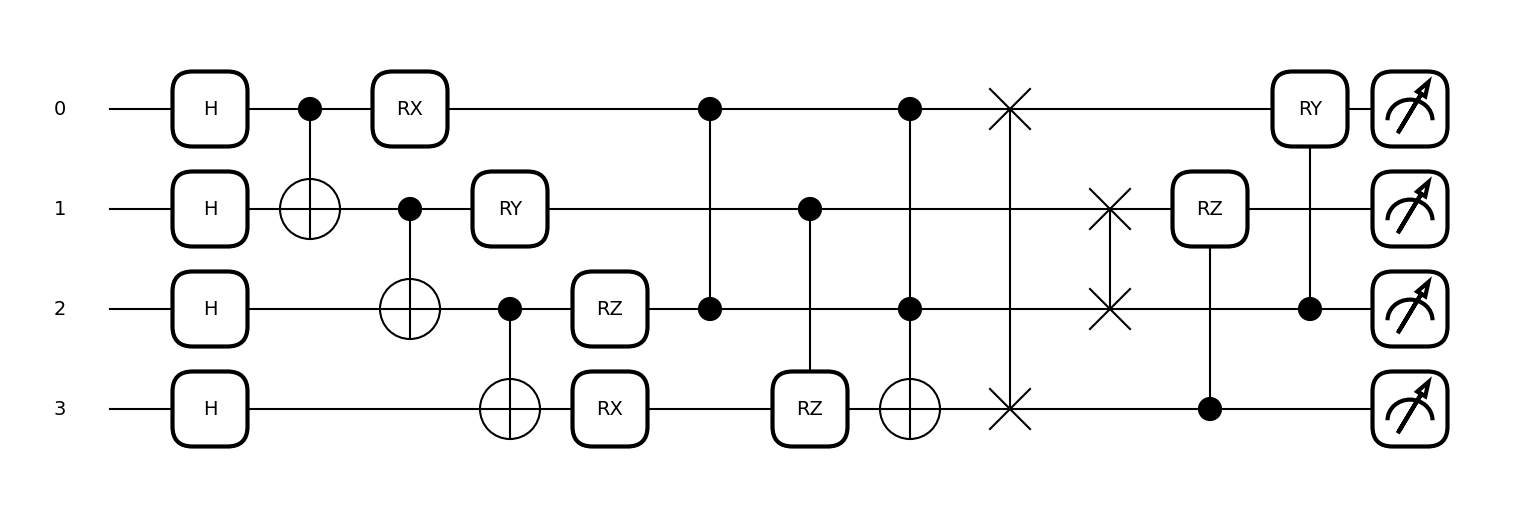

In [3]:
# draw circuit:
_ = qml.draw_mpl(Complex1, style="black_white")(params)

We execute and measure the circuit on the Dynex platform:

In [4]:
# Execute the circuit on Dynex:
measure = dynex_circuit.execute(Complex1, params, wires, mainnet=True, method='measure')
print('Mesaure:',measure)

╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │   ELAPSED │   WORKERS READ │   CIRCUITS │   STEPS │   GROUND STATE │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼────────────────┼────────────┼─────────┼────────────────┤
│      29839 │       68 │             332 │        0.00 │      1.70 │              1 │    7357952 │     256 │      326009.00 │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴────────────────┴────────────┴─────────┴────────────────╯
╭────────────┬─────────────────┬────────────┬───────┬───────────┬───────────────┬─────────────────────────────┬──────────────┬──────────╮
│     WORKER │         VERSION │   CIRCUITS │   LOC │    ENERGY │       RUNTIME │                 LAST UPDATE │        STEPS │   STATUS │
├────────────┼─────────────────┼────────────┼───────┼───────────┼───────────────┼────────